<a href="https://colab.research.google.com/github/chaserobertson/credit-fraud/blob/main/rf/rf_hyp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow_decision_forests
!pip install mealpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Restart the Google Colab connection after package install! CMD/Ctrl M

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!unzip /content/drive/MyDrive/archive_synth.zip

Archive:  /content/drive/MyDrive/archive_synth.zip
replace fraudTest.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace fraudTrain.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_decision_forests as tfdf
import mealpy

In [5]:
df = pd.read_csv("fraudTrain.csv", index_col=0)
df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [6]:
tf.random.set_seed(1234)

label = "is_fraud"
class_weight = {0: 0.01, 1: 0.99}
metrics = ["Accuracy", "FalsePositives", "FalseNegatives", "Precision", "Recall"]

test_inds = np.random.rand(len(df)) < 0.2
train_df = df[~test_inds]
test_df = df[test_inds]

In [7]:
# convert pandas df to tensor ds
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label=label)

/usr/local/lib/python3.7/dist-packages/tensorflow_decision_forests/keras/core.py:2574: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features_dataframe = dataframe.drop(label, 1)


In [8]:
# create and fit default RF model
model = tfdf.keras.RandomForestModel(verbose=1)
model.compile(metrics=metrics)
model.fit(x=train_ds, class_weight=class_weight)

Use /tmp/tmp0iw6q63w as temporary training directory
Reading training dataset...
Training dataset read in 0:00:15.182184. Found 1037274 examples.
Training model...
Model trained in 0:45:19.173881
Compiling model...


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


In [9]:
# OOB error during training
inspector = model.make_inspector()
inspector.evaluation()

Evaluation(num_examples=1037274, accuracy=0.8991981595816945, loss=0.3323361245875877, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [10]:
# test error
evaluation = model.evaluate(test_ds, return_dict=True)

for k, v in evaluation.items():
    print(f"{k}: {v:.3f}")

260/260 [==============================] - 24s 89ms/step - loss: 0.0000e+00 - Accuracy: 0.9972 - false_positives: 324.0000 - false_negatives: 403.0000 - precision: 0.7722 - recall: 0.7315
loss: 0.000
Accuracy: 0.997
false_positives: 324.000
false_negatives: 403.000
precision: 0.772
recall: 0.732


In [11]:
model.summary()

Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (21):
	amt
	category
	cc_num
	city
	city_pop
	dob
	first
	gender
	job
	last
	lat
	long
	merch_lat
	merch_long
	merchant
	state
	street
	trans_date_trans_time
	trans_num
	unix_time
	zip

Trained with weights

Variable Importance: MEAN_MIN_DEPTH:
    1. "trans_date_trans_time" 12.671820 ################
    2.             "trans_num" 12.671820 ################
    3.               "__LABEL" 12.671820 ################
    4.             "__WEIGHTS" 12.671820 ################
    5.                  "long" 12.568760 ###############
    6.                   "zip" 12.541321 ###############
    7.                   "lat" 12.504189 #####

In [12]:
inspector.variable_importances()

{'MEAN_MIN_DEPTH': [("trans_date_trans_time" (4; #17), 12.671819812689625),
  ("trans_num" (4; #18), 12.671819812689625),
  ("__LABEL" (4; #21), 12.671819812689625),
  ("__WEIGHTS" (1; #22), 12.671819812689625),
  ("long" (1; #11), 12.568760327266599),
  ("zip" (1; #20), 12.541320757303032),
  ("lat" (1; #10), 12.504189438336995),
  ("cc_num" (1; #2), 12.479523757010643),
  ("merch_long" (1; #13), 12.428984779369173),
  ("merch_lat" (1; #12), 12.363261932552957),
  ("city_pop" (1; #4), 12.003195060192457),
  ("gender" (4; #7), 10.173730940780235),
  ("job" (4; #8), 9.2931849182125),
  ("city" (4; #3), 9.28111792984208),
  ("first" (4; #6), 9.155865090594714),
  ("street" (4; #16), 9.143959791057299),
  ("last" (4; #9), 9.142746410077432),
  ("dob" (4; #5), 9.083565487322327),
  ("merchant" (4; #14), 8.091553411484819),
  ("unix_time" (1; #19), 7.776084283386567),
  ("state" (4; #15), 4.904257015373581),
  ("category" (4; #1), 2.894696864377513),
  ("amt" (1; #0), 2.573972297518583)],
 

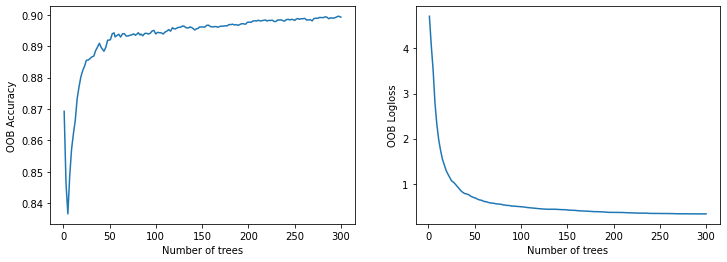

In [13]:
logs = inspector.training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("OOB Accuracy")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("OOB Logloss")

plt.show()